# Algerian Forest Fire Dataset | EDA | Feature Engineering | Model Building

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nitinchoudhary012/algerian-forest-fires-dataset")

print("Path to dataset files:", str(path))

C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\himan\.cache\kagglehub\datasets\nitinchoudhary012\algerian-forest-fires-dataset\versions\2


In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

for file in os.listdir(path):
    print(file)

Algerian_forest_fires_dataset.csv


In [3]:
# Now loading the dataset
path_file = "C:/Users/himan/.cache/kagglehub/datasets/nitinchoudhary012/algerian-forest-fires-dataset/versions/2/Algerian_forest_fires_dataset.csv"
data = pd.read_csv(path_file)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
# Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


# Data Cleaning

In [5]:

# Checking for the missig values
data.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [6]:
data[data.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


It means at index number 123 and a cell above, the data values are missing.

The dataset contains information about two Regions.  
1) Bejaia Region
2) Sidi-Bel Abbes Region Dataset  

Now making new columns based on the Region.

In [7]:
data.loc[:123, "Region"] = 0
data.loc[126:, "Region"] = 1
# From the csv file, it is clear that from index 123 above, there are all values and also after from index 126. Between them lies our missing values.
df = data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [9]:
df[["Region"]] = df[["Region"]].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [ ]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         2
dtype: int64

In [ ]:
# Removing all null values -
df = df.dropna().reset_index(drop = True)

# Never use it directly 
# df.dropna().reset_index(drop = True)
# This is wrong. Always use it in a variable.

In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0


In [ ]:
# Removing index number 122
df = df.drop(122).reset_index(drop = True)

In [ ]:
df.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In the above output, we can see there are some whitespaces in the column name. This also needs to be handled.

In [ ]:
# Fixing whitespaces-
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


The columns are object type. Let's convert columns till "Ws" into integer datatype.

In [ ]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    object 
 7   FFMC         241 non-null    object 
 8   DMC          241 non-null    object 
 9   DC           241 non-null    object 
 10  ISI          241 non-null    object 
 11  BUI          241 non-null    object 
 12  FWI          241 non-null    object 
 13  Classes      241 non-null    object 
 14  Region       241 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.4+ KB


> the object as Dtype means the column values are stored as Text or String. Due to its older behaviour, its still keep going.

Now changing other columns in float Datatype

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
#df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [ ]:
# That above thing can be done in more better way as -
objects = [features for features in df.columns if df[features].dtypes == "O"]

In [ ]:
for i in objects:
    if i != "Classes":
        df[i] = df[i].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          241 non-null    int64  
 1   month        241 non-null    int64  
 2   year         241 non-null    int64  
 3   Temperature  241 non-null    int64  
 4   RH           241 non-null    int64  
 5   Ws           241 non-null    int64  
 6   Rain         241 non-null    float64
 7   FFMC         241 non-null    float64
 8   DMC          241 non-null    float64
 9   DC           241 non-null    float64
 10  ISI          241 non-null    float64
 11  BUI          241 non-null    float64
 12  FWI          241 non-null    float64
 13  Classes      241 non-null    object 
 14  Region       241 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.4+ KB


The feature "Classes" is a categorical feature so it needs to be as object.

In [ ]:
# Lets save the cleaned dataset
df.to_csv("Cleaned-Algerian-Fire_Dataset.csv", index = False)

# Exploratory Data Analysis

In [ ]:
# Removing unnecessary features
df_copy = df.drop(['day', 'month', 'year'], axis = 1 )

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
# Now Encoding of the categories in Classes column.
# Making them 1 and 0 based on fire and not fire
df_copy['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [ ]:
df_copy['Classes'].unique()

array([0, 1])

In [ ]:
df_copy['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In the table above, we can see there are multiple "not fire" but the result is somewhat different than what we expected. The main reason is the whitespaces which can be present in the values. 
Now lets clean that too...

In [ ]:
# df_copy['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1) 
# Use this command to fix that issue. I already used it above.

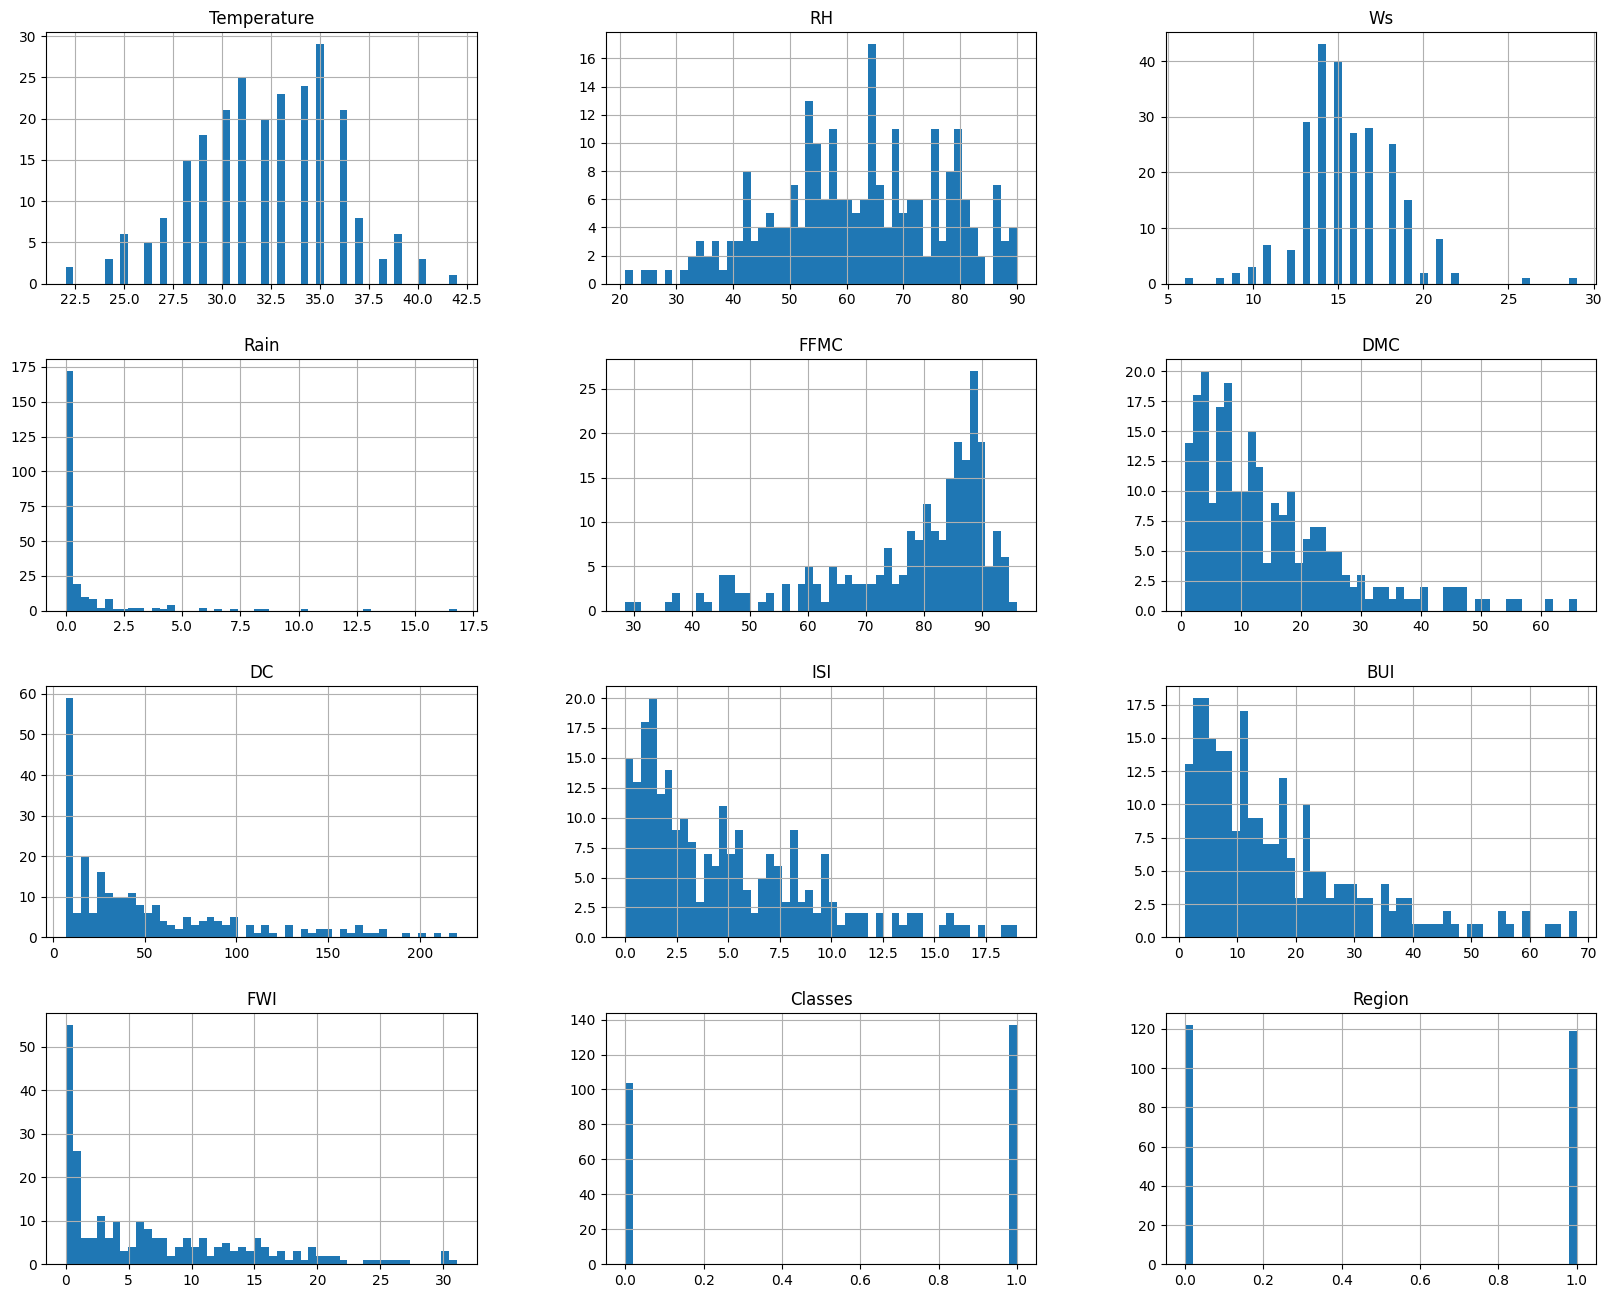

In [ ]:
# Visualizing the data for all features -
#plt.style.use('seaborn')
df_copy.hist(bins = 50, figsize=(20, 16))
plt.show()

In [ ]:
# Percentage on Pie Chart
percentage = df_copy['Classes'].value_counts(normalize = True) * 100
percentage
# 1- Fires
# 0- Not Fires

Classes
1    56.846473
0    43.153527
Name: proportion, dtype: float64

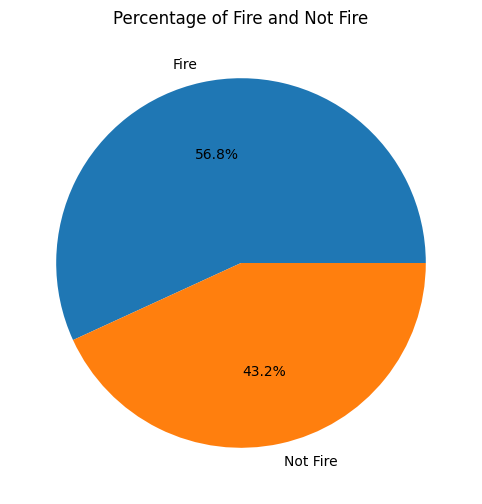

In [ ]:
# Demonstrating on Pie Chart
classlables = ['Fire', 'Not Fire']
plt.figure(figsize = (10, 6))
plt.pie(percentage, labels = classlables, autopct="%1.1f%%")
plt.title("Percentage of Fire and Not Fire")
plt.show()

In [ ]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651184,-0.288538,-0.324519,0.679353,0.485406,0.375432,0.604182,0.459374,0.566649,0.516166,0.273554
RH,-0.651184,1.000000,0.251609,0.219067,-0.643718,-0.405444,-0.223201,-0.685228,-0.350446,-0.578951,-0.428928,-0.410789
Ws,-0.288538,0.251609,1.000000,0.179167,-0.182322,-0.009466,0.072004,-0.000320,0.023004,0.024420,-0.080857,-0.173839
Rain,-0.324519,0.219067,0.179167,1.000000,-0.541693,-0.285066,-0.294782,-0.344192,-0.296227,-0.321227,-0.375657,-0.047080
FFMC,0.679353,-0.643718,-0.182322,-0.541693,1.000000,0.599438,0.502847,0.737525,0.587699,0.688538,0.766622,0.237933
DMC,0.485406,-0.405444,-0.009466,-0.285066,0.599438,1.000000,0.875084,0.677847,0.982107,0.874943,0.581867,0.201872
DC,0.375432,-0.223201,0.072004,-0.294782,0.502847,0.875084,1.000000,0.505104,0.941620,0.737783,0.507224,-0.072004
ISI,0.604182,-0.685228,-0.000320,-0.344192,0.737525,0.677847,0.505104,1.000000,0.641194,0.922326,0.732736,0.273803
BUI,0.459374,-0.350446,0.023004,-0.296227,0.587699,0.982107,0.941620,0.641194,1.000000,0.856918,0.582868,0.098330
FWI,0.566649,-0.578951,0.024420,-0.321227,0.688538,0.874943,0.737783,0.922326,0.856918,1.000000,0.716898,0.206362


<Axes: >

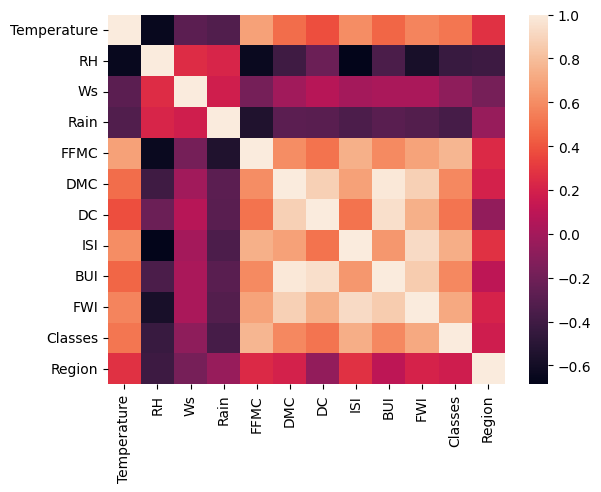

In [ ]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

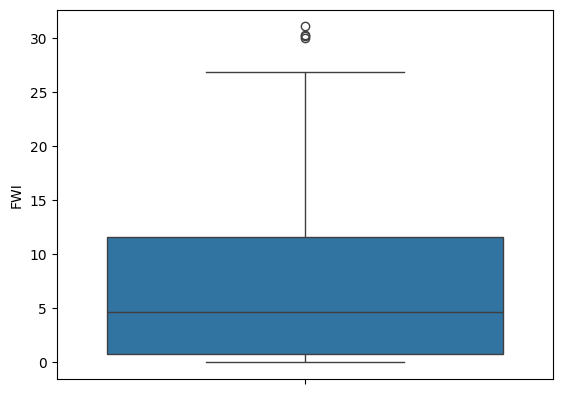

In [ ]:
# Checking for any outliers or others -
sns.boxplot(df["FWI"])

In [ ]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

Text(0.5, 1.0, 'Fire Analysis of Bejaia Region')

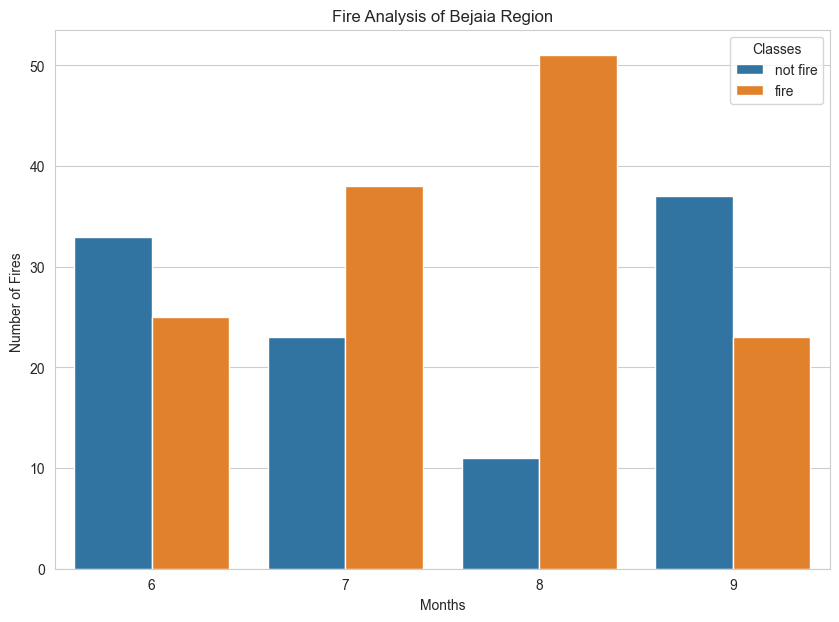

In [ ]:
# Monthly Fire Analysis
plt.subplots(figsize = (10, 7))
sns.countplot(x = 'month', hue = "Classes", data = df)
sns.set_style('whitegrid')

plt.xlabel("Months")
plt.ylabel("Number of Fires ")
plt.title("Fire Analysis of Bejaia Region")

# Feature Selection

In [ ]:
import os
print(os.listdir())

['.git', 'Algerian_Fire.ipynb', 'Cleaned-Algerian-Fire_Dataset.csv', 'crime-against-women-in-india-2001-2021.ipynb', 'DataSets', 'Feature Engineering.ipynb', 'Flight price.ipynb', 'Flight.ipynb', 'gas_price.png', 'Google Play Store.ipynb', 'Google PlayStore Dataset.ipynb', 'matplot.ipynb', 'Numpy.py', 'Pandas.py', 'Pandaz.ipynb', 'PieChart.png', 'Seaborn.ipynb', 'tempCodeRunnerFile.py']


In [ ]:
# opening the saved file for feature selection
df_cleaned = pd.read_csv(r"C:\Users\himan\Desktop\ML\EDA\Cleaned-Algerian-Fire_Dataset.csv")

In [ ]:
df_cleaned.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
df_cleaned.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [ ]:
df_cleaned.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [ ]:
df_cleaned["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Removing the whitespaces -

In [ ]:
df_cleaned["Classes"] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [ ]:
df_cleaned.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [ ]:
df_cleaned['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [ ]:
# Dividing features into Dependent and Independent Features-
X = df_cleaned.drop('FWI', axis = 1)
Y = df_cleaned['FWI'] # Feature which we are going to predict.

In [ ]:
# Train Test Spilt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((180, 11), (61, 11))

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658884,-0.283527,-0.329838,0.695701,0.490708,0.368994,0.609129,0.461458,0.529054,0.254575
RH,-0.658884,1.000000,0.255366,0.218938,-0.636912,-0.383872,-0.201891,-0.687823,-0.330053,-0.429008,-0.388707
Ws,-0.283527,0.255366,1.000000,0.315301,-0.191422,-0.012974,0.078715,0.009717,0.020902,-0.088843,-0.199183
Rain,-0.329838,0.218938,0.315301,1.000000,-0.532895,-0.266456,-0.284452,-0.324347,-0.277710,-0.343453,-0.104973
FFMC,0.695701,-0.636912,-0.191422,-0.532895,1.000000,0.598514,0.504184,0.733343,0.584447,0.763900,0.266560
DMC,0.490708,-0.383872,-0.012974,-0.266456,0.598514,1.000000,0.878344,0.665321,0.984121,0.589805,0.207122
DC,0.368994,-0.201891,0.078715,-0.284452,0.504184,0.878344,1.000000,0.508745,0.947259,0.502396,-0.084035
ISI,0.609129,-0.687823,0.009717,-0.324347,0.733343,0.665321,0.508745,1.000000,0.628279,0.727029,0.282773
BUI,0.461458,-0.330053,0.020902,-0.277710,0.584447,0.984121,0.947259,0.628279,1.000000,0.578800,0.104204
Classes,0.529054,-0.429008,-0.088843,-0.343453,0.763900,0.589805,0.502396,0.727029,0.578800,1.000000,0.203781


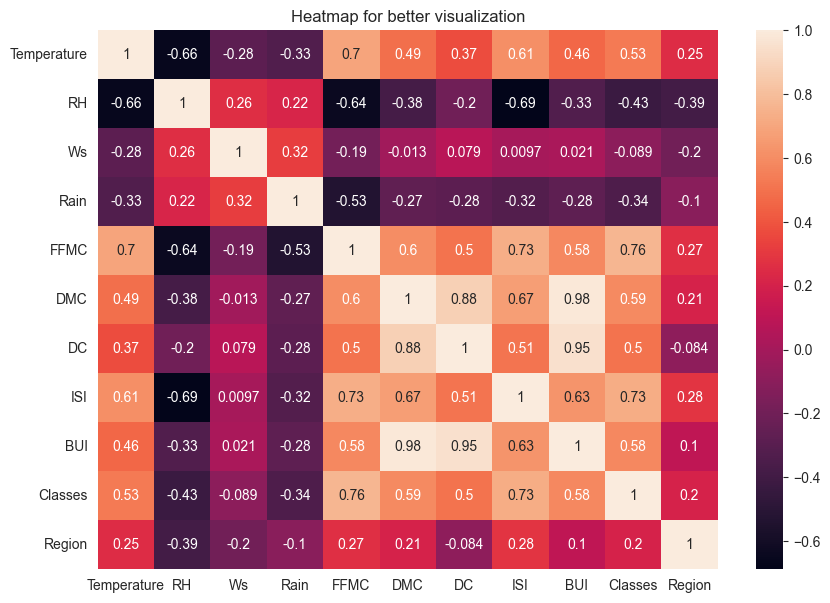

In [ ]:
# Checking for multicollinearity
plt.figure(figsize = (10, 7))
corr = X_train.corr()
sns.heatmap(corr, annot = True)
plt.title("Heatmap for better visualization")
plt.show()

In [ ]:
# X_train.columns() > It will give you error because assigning "()" will try to behave like function which is not callable unless not built.
# We can check it like -> callable(X_train.columns) -> True|YES, False|then No, we cant call.
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [ ]:
# Creating a function to find out highly correlated features 
def correlation(dataset: pd.DataFrame, threshold_value: float) -> list[str]:
    col_corr = set() # We don't want same features to store (ex-> i for i in csv.columns ; each col with itself )
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold_value:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    
    return col_corr

In [ ]:
# Finding the columns | > Threshold --- Domain Expertise
corr_features = correlation(X_train, 0.85) 

In [ ]:
# Dropping features having Threshold value greater than 0.85
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

In [ ]:
X_train.shape, X_test.shape

((180, 9), (61, 9))

Hence, two features are removed.

# Feature Scaling or Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() # an in-built function in Scikit-learn (a Library of Python).
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.82582663,  0.76875417,  1.25919129, ..., -0.62417554,
        -1.11803399, -0.97801929],
       [-0.03373714, -0.48680422, -0.57458243, ...,  0.06950049,
         0.89442719,  1.02247472],
       [ 2.07850149, -2.07277271, -0.20782769, ...,  2.84420462,
         0.89442719,  1.02247472],
       ...,
       [-1.88194595,  0.90091821,  0.5256818 , ..., -1.07865294,
        -1.11803399, -0.97801929],
       [ 1.286412  , -0.48680422, -0.20782769, ...,  0.85885598,
         0.89442719,  1.02247472],
       [-0.5617968 ,  0.96700023,  1.99270077, ..., -0.86337417,
        -1.11803399, -0.97801929]], shape=(180, 9))

Text(0.5, 1.0, 'X_test after Scaling')

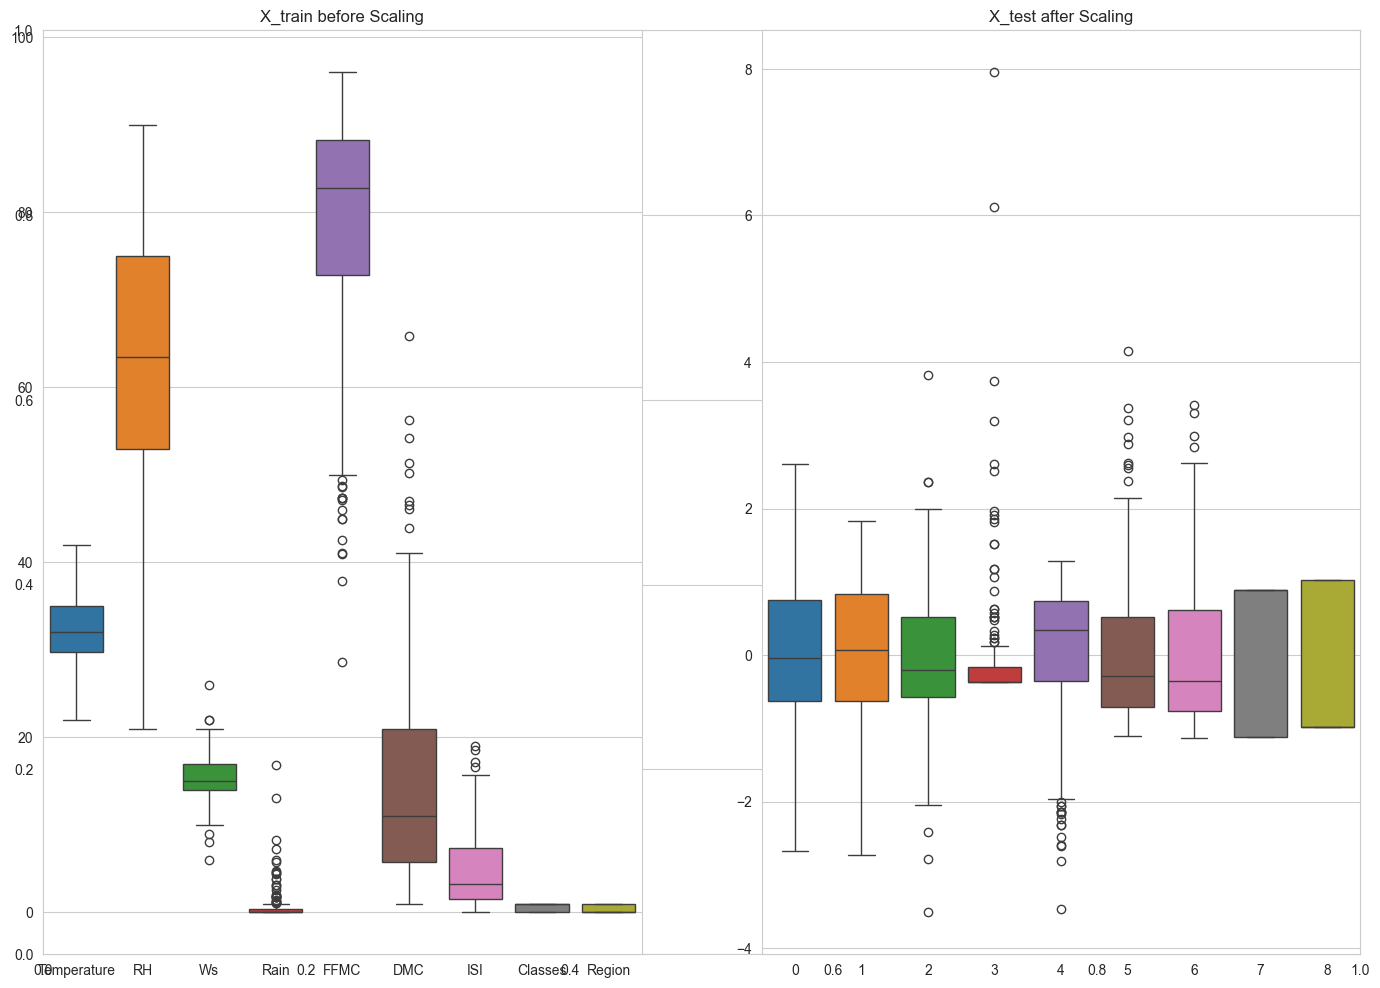

In [ ]:
# Checking for Outliers using BoxPlot
plt.subplots(figsize = (17, 12))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before Scaling")

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_test after Scaling")

# Model Training

In [ ]:
# importing required libraries for model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Linear Regression Model

In [ ]:
# Building the Linear Regression Model-

# importing required library
linearReg = LinearRegression()

# Training the model
linearReg.fit(X_train_scaled, Y_train)
y_pred = linearReg.predict(X_test_scaled)

# Checking the performance
MAE = mean_absolute_error(Y_test, y_pred)
r2_Score = r2_score(Y_test, y_pred)

# Printing the result
print("Mean Absolute Error: ", MAE)
print("R2 Score: ", r2_Score)

Mean Absolute Error:  0.6612623700751249
R2 Score:  0.9836843464471655


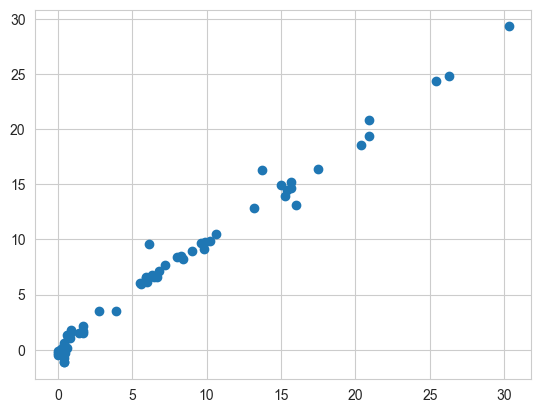

In [ ]:
# Visualizing the result
plt.scatter(Y_test, y_pred)

### Lasso Regression Model

In [ ]:
# Building the Lasso Regression Model

# importing required library
from sklearn.linear_model import Lasso

LassoReg = Lasso()

# Training the Model
LassoReg.fit(X_train_scaled, Y_train)
y_pred = LassoReg.predict(X_test_scaled)

# Checking the Performance
MAE = mean_absolute_error(Y_test, y_pred)
r2_Score = r2_score(Y_test, y_pred)

# Printing the result
print("Mean Absolute Error: ", MAE)
print("R2 Score: ", r2_Score)

Mean Absolute Error:  1.2522655115292307
R2 Score:  0.9473075426805143


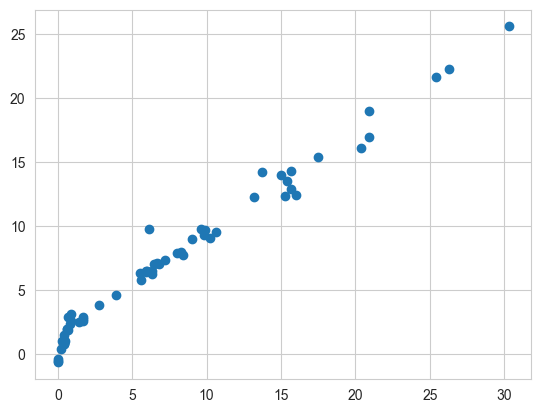

In [ ]:
# Visualizing the Result
plt.scatter(Y_test, y_pred)

### Ridge Regression Model

In [ ]:
# Building the Ridge Regression Model

# importing required library
from sklearn.linear_model import Ridge

# Training the Model
RidgeReg = Ridge()

RidgeReg.fit(X_train_scaled, Y_train)
y_pred = RidgeReg.predict(X_test_scaled)

# Checking the Performance
MAE = mean_absolute_error(Y_test, y_pred)
r2_Score = r2_score(Y_test, y_pred)

# Printing the result
print("Mean Absolute Error: ", MAE)
print("R2 Score: ", r2_Score)

Mean Absolute Error:  0.6864171979933394
R2 Score:  0.9830258655702742


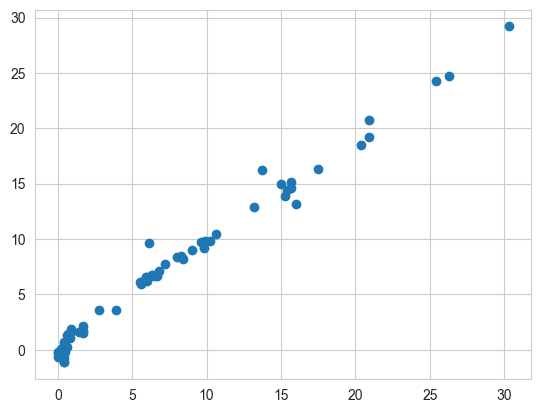

In [ ]:
# Visulazing the Result
plt.scatter(Y_test, y_pred)

### ElasticNet Regression Model

In [ ]:
# Building the ElasticNet Regression Model

# importing required library
from sklearn.linear_model import ElasticNet

# Training the Model
ElasticNet_model = ElasticNet()

ElasticNet_model.fit(X_train_scaled, Y_train)
y_pred = ElasticNet_model.predict(X_test_scaled)

# Checking the Performance of the Model
MAE = mean_absolute_error(y_pred, Y_test)
r2_Score = r2_score(y_pred, Y_test)

# Printing the result
print("Mean Absolute Error: ", MAE)
print("R2 Score: ", r2_Score)

Mean Absolute Error:  1.924851265262548
R2 Score:  0.7733220503701906


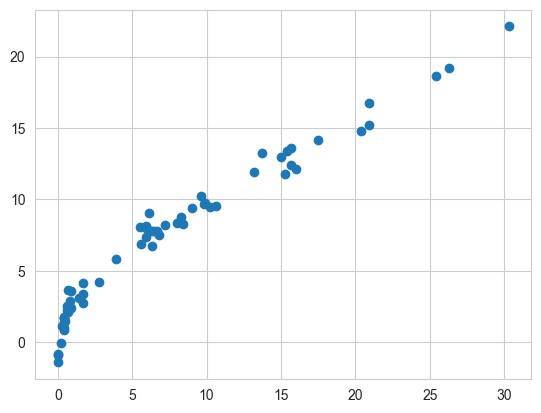

In [ ]:
# Visualizing the Result
plt.scatter(Y_test, y_pred)